Chapter 4: Transportation Data

Script 4-1: Shortest Paths on Stores Data

In [1]:
#import packages
import networkx as nx

{('store1', 'store2'): Text(0.024783984348101418, -0.3040981379330776, '2'),
 ('store1', 'store3'): Text(-0.28184198110899095, 0.28154668766931523, '2.4'),
 ('store1', 'store4'): Text(-0.7263634670974062, 0.018939602539027822, '3'),
 ('store1', 'store5'): Text(-0.44222658309739993, -0.6255802039170382, '3'),
 ('store2', 'store3'): Text(0.6933740345429075, 0.3969099174974188, '3.7'),
 ('store2', 'store4'): Text(0.2488525485544923, 0.1343028323671313, '1.4'),
 ('store2', 'store5'): Text(0.5329894325544985, -0.5102169740889346, '4.3'),
 ('store3', 'store4'): Text(-0.0577734169026001, 0.7199476579695242, '4.9'),
 ('store3', 'store5'): Text(0.22636346709740615, 0.07542785151345821, '0.9'),
 ('store4', 'store5'): Text(-0.21815801889100905, -0.18717923361682923, '5.4')}

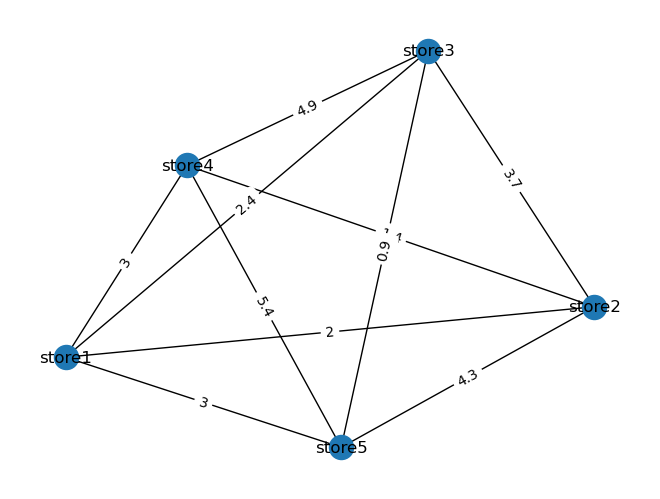

In [2]:
#create the Stores network
STRS = nx.Graph()
STRS.add_nodes_from(["store1","store2","store3","store4","store5"])

#add edges
e1 = [("store1","store2",2),("store1","store3",2.4),("store1","store4",3),("store1","store5",3)]
e2 = [("store2","store3",3.7),("store2","store4",1.4),("store2","store5",4.3)]
e3 = [("store3","store4",4.9),("store3","store5",0.9),("store4","store5",5.4)]

#define weights
STRS.add_weighted_edges_from(e1)
STRS.add_weighted_edges_from(e2)
STRS.add_weighted_edges_from(e3)

#plot
weight_labels=nx.get_edge_attributes(STRS,'weight')
pos = nx.spring_layout(STRS)
nx.draw(STRS,pos,with_labels=True,)
nx.draw_networkx_edge_labels(STRS,pos,edge_labels=weight_labels) 

In [3]:
#create adjacency matrix
adj1 = nx.adjacency_matrix(STRS)
adj1.todense() 

C:\Users\njfar\AppData\Local\Temp\ipykernel_8984\2605771057.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj1 = nx.adjacency_matrix(STRS)


matrix([[0. , 2. , 2.4, 3. , 3. ],
        [2. , 0. , 3.7, 1.4, 4.3],
        [2.4, 3.7, 0. , 4.9, 0.9],
        [3. , 1.4, 4.9, 0. , 5.4],
        [3. , 4.3, 0.9, 5.4, 0. ]])

In [4]:
#find shortest paths starting at Store 1
length1, path1 = nx.single_source_dijkstra(STRS,"store1")
length1

{'store1': 0, 'store2': 2, 'store3': 2.4, 'store4': 3, 'store5': 3}

Script 4-2: A* algorithm

{('store1', 'store2'): Text(0.2201722929079385, 0.5421658684544928, '2'),
 ('store1', 'store4'): Text(0.31077573057388513, 0.07342677800382648, '3'),
 ('store2', 'store3'): Text(-0.372540925941987, 0.42657322199617337, '3.7'),
 ('store2', 'store4'): Text(-0.07598806404114071, 0.2251902714899901, '1.4'),
 ('store3',
  'store4'): Text(-0.28193748827604037, -0.042165868454492966, '4.9'),
 ('store4', 'store5'): Text(0.06907288218050481, -0.6217744094803381, '5.4')}

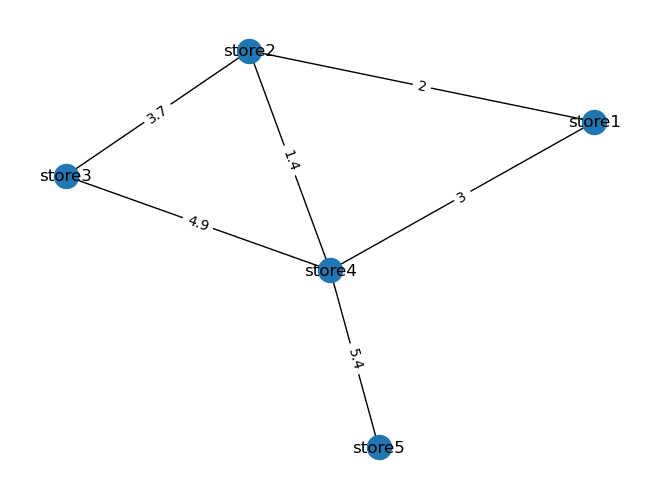

In [5]:
#create a different Stores network
STRS2 = nx.Graph()
STRS2.add_nodes_from(["store1","store2","store3","store4","store5"])

#add edges
e12 = [("store1","store2",2),("store1","store4",3)]
e22 = [("store2","store3",3.7),("store2","store4",1.4)]
e32 = [("store3","store4",4.9),("store4","store5",5.4)]

#define weights
STRS2.add_weighted_edges_from(e12)
STRS2.add_weighted_edges_from(e22)
STRS2.add_weighted_edges_from(e32)

#plot
weight_labels=nx.get_edge_attributes(STRS2,'weight')
pos = nx.spring_layout(STRS2)
nx.draw(STRS2,pos,with_labels=True,)
nx.draw_networkx_edge_labels(STRS2,pos,edge_labels=weight_labels) 

In [6]:
#find shortest path from Store 2 to Store 5
nx.astar_path(STRS2,"store2","store5", weight='weight')

['store2', 'store4', 'store5']

Script 4-3: Traveling Salesman Problem

In [7]:
#define traveling salesman algorithm and apply it to the stores networks
tsp = nx.approximation.traveling_salesman_problem
tsp(STRS)

['store1', 'store3', 'store5', 'store4', 'store2', 'store1']

In [8]:
#apply TSP algorithm to the second stores networks
tsp(STRS2)

['store1',
 'store4',
 'store5',
 'store4',
 'store2',
 'store3',
 'store2',
 'store1']

Script 4-4: Maximum Flow/Minimum Cut Algorithm

In [9]:
#build the city intersection network
G1=nx.DiGraph()
G1.add_edge("a", "b", capacity=2.0)
G1.add_edge("a", "d", capacity=0.5)
G1.add_edge("b", "d", capacity=3.0)
G1.add_edge("c", "d", capacity=2.5)
G1.add_edge("c", "e", capacity=1.0)
G1.add_edge("e", "f", capacity=4.0)
G1.add_edge("f", "g", capacity=1.0)

In [10]:
#find cut-points
partition = nx.minimum_cut(G1, "a", "g")
print(partition)

(0, ({'a', 'b', 'd'}, {'e', 'f', 'c', 'g'}))
